# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica: Método de Simpson

### Ejercicio 17.- Calcula una aproximación de la integral $\displaystyle \int_{-3}^{-1} \sqrt{2+\cos(x^2)}\, dx$ mediante el Método de Simpson con error absoluto menor que $10^{-3}$.  Compara tu aproximación con la calculada por SAGE y representa gráficamente el problema.

SOLUCIÓN

En el <strong>Método de Simpson</strong> subdividimos el intervalo $[a,b]$ con los siguientes $2n+1$ nodos equiespaciados: $$x_j=a+j\cdot \frac{b-a}{2n}$$ para $j=0,1,\dots,2n$.


La fórmula del Método de Simpson aproxima la integral de la siguiente forma:

 $$  \int_a^b f(x) \, dx \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{b-a}{6n}\left(f(a)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(b)\right) $$ 
 
La cota del error absoluto cometido en el Método de Simpson la podemos dar de la siguiente forma: 

 $$  \left|\int_a^b f(x) \, dx-{\rm Simpson}_{ {{\bf n}}}(f)\right|   \leq  \frac{(b-a)M}{180} \cdot {h^4}, h=\dfrac{b-a}{2n} $$
 o bien
 $$  \left|\int_a^b f(x) \, dx-{\rm Simpson}_{ {{\bf n}}}(f)\right|   \leq  \dfrac{(b-a)^5}{180\cdot  (2\cdot n)^4}\cdot M  $$ 
siendo $M>0$ una constante tal que $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$. 
siendo $M>0$ una constante tal que $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$. 

Comenzamos con nuestro caso particular,

In [1]:
f(x)=sqrt(2+cos(x^2))#definimos f
f

x |--> sqrt(cos(x^2) + 2)

In [2]:
a=-3;b=-1;#definimos el intervalo

<p>Veamos qué área queremos calcular.</p>

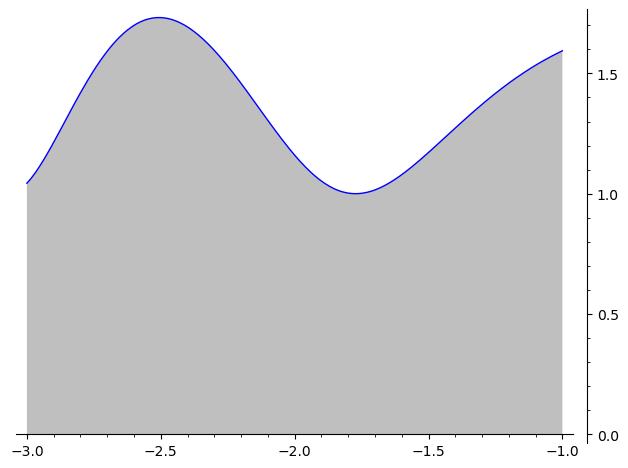

In [3]:
plot(f,x,a,b,fill=true)

Buscamos $M>0$ una constante tal que $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$.

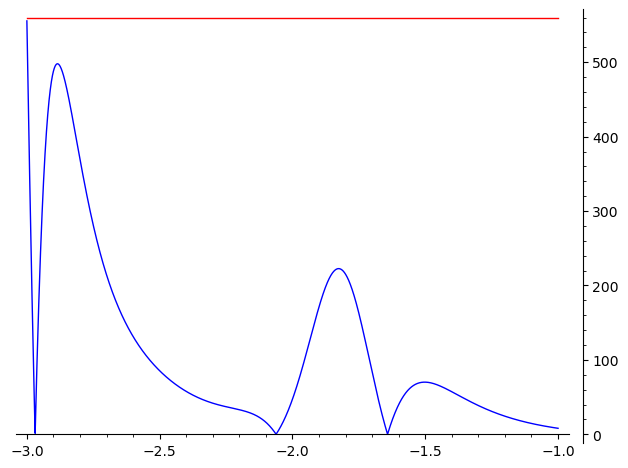

In [4]:
#show(derivative(f(x),x,4))
plot(abs(derivative(f(x),x,4)),(x,a,b))+plot(560,a,b,color='red')

En la gráfica anterior vemos que se puede tomar $M=560$. 


Sabemos que la cota de error viene dada por:
 
$$\left|\int_a^b f(x) \, dx-{\rm Simpson}_{\bf n}(f)\right| \leq \dfrac{(b-a)^5}{180\cdot(2\cdot n)^4}\cdot M$$   para todo $n\in \mathbb{N}$

Para determinar el número $n$ de parábolas que debemos utilizar para alcanzar la precisión deseada, buscamos un $n$ que cumpla

$$\dfrac{(b-a)^5}{180\cdot(2\cdot n)^4}\cdot M \leq \epsilon  \Longleftrightarrow 
\dfrac{1}{n^4} \leq \dfrac{180·2^4·\epsilon}{M·(b-a)^5}  \Longleftrightarrow
n  \geq \sqrt[4]{\dfrac{(b-a)^5}{180\cdot 2^4\cdot \epsilon}\cdot M}=\left(\dfrac{(b-a)^5}{180\cdot 16\cdot \epsilon}\cdot M\right)^{1/4}$$

In [5]:
M=1300;
epsilon=10^(-3);

In [6]:
numerical_approx(((b-a)^5/(180*16*epsilon)*M)^(1/4))  
#por lo que n=11

10.9628938932869

También podemos utilizar un bucle usando "while" para el cálculo de n:

In [7]:
n=1
while (b-a)^5*M/(180*2^4*n^4)>epsilon:
    n=n+1

In [8]:
n

11

<p>Por tanto, vamos a aplicar el Método de Simpson con $n=11$ parábolas.</p>
<p>Calculamos la aproximación:</p>

In [9]:
X=[a+k*(b-a)/(2*n) for k in [0..2*n]] # Los nodos

<p>Ahora aproximamos la integral por el método de Simpson. Recordemos:</p>
<p>$$ \int_a^b f(x) \, dx \ \approx \  {{\rm Simpson}_{{{\bf n}}}(f)}=\frac{b-a}{6n}\left(f(a)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(b)\right) $$</p>

In [10]:
simpson=(b-a)/(6*n)*(f(a)+4*sum(f(X[2*k-1]) for k in [1..n])+2*sum(f(X[2*k]) for k in [1..n-1])+f(b))
numerical_approx(simpson)

2.71518080312747

Comparamos con la calculada por SAGE

In [11]:
numerical_integral(f,a,b)[0]

2.715131901620457

In [12]:
abs((numerical_integral(f,a,b)[0]-simpson).n())<10^(-4) #comprobación

True

Representamos ahora gráficamente el área calculada:

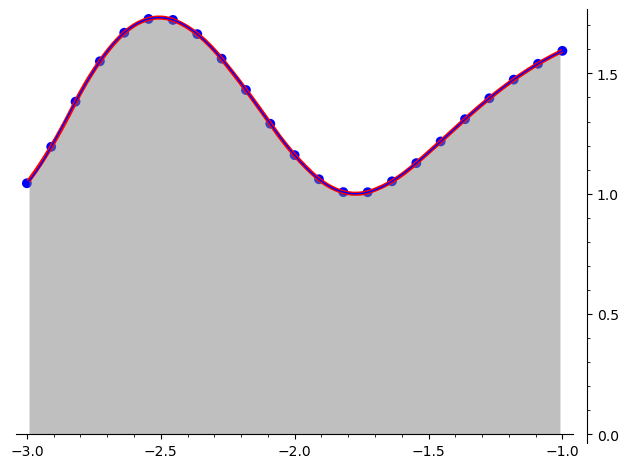

In [13]:
XY=[(X[i],f(X[i])) for i in [0..2*n]]
P=piecewise([ [ (X[2*(i-1)],X[2*i]),RR['x'].lagrange_polynomial(
[XY[2*(i-1)],XY[2*i-1],XY[2*i]]) ] for i in [1..n] ] ,var=x)
plot(P,a,b,color='red',thickness=3,fill=true)+plot(f,a,b)+point2d(XY,size=50)